In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

%matplotlib inline

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('dataset/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# convert ' ' in headers to '_'
headers = df.columns.values
df.columns = map(lambda x: x.replace(' ', '_'), headers)

In [4]:
# form X and y (X: predictor vars, y: target vars)
X = df.drop('quality', axis=1)
y1 = df['quality']

In [5]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [6]:
y1.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

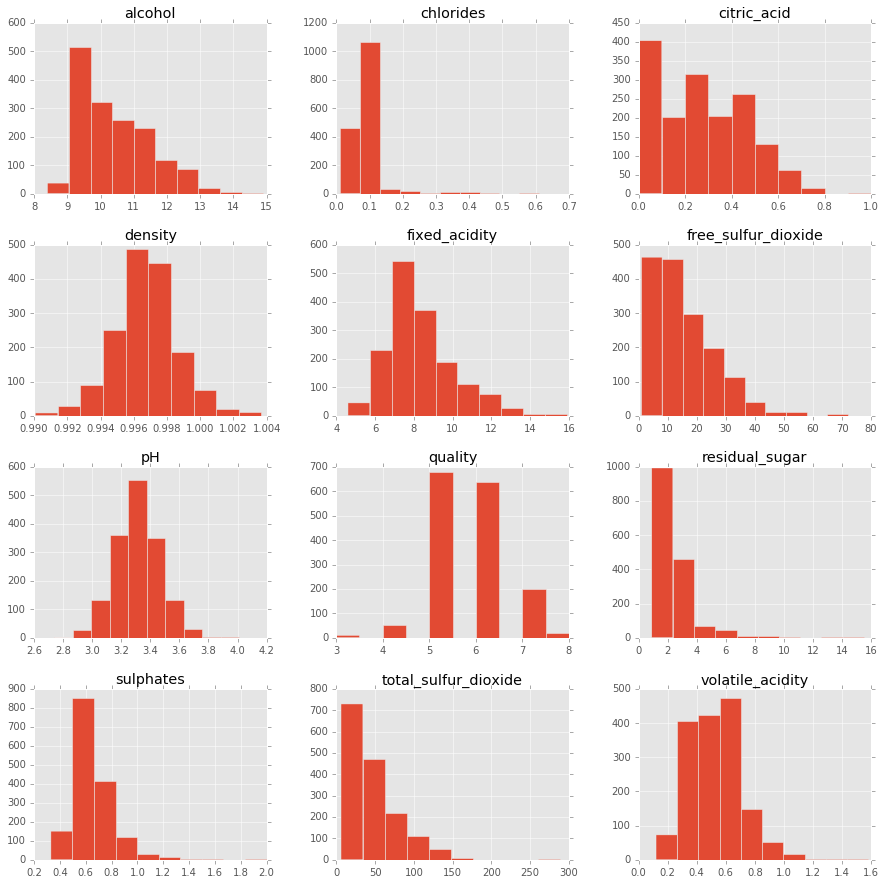

In [7]:
# plot histograms of each columns
plt.style.use('ggplot') # use 'plt.style.available' to see the available styles
pd.DataFrame.hist(df, figsize=[15, 15])
plt.show()

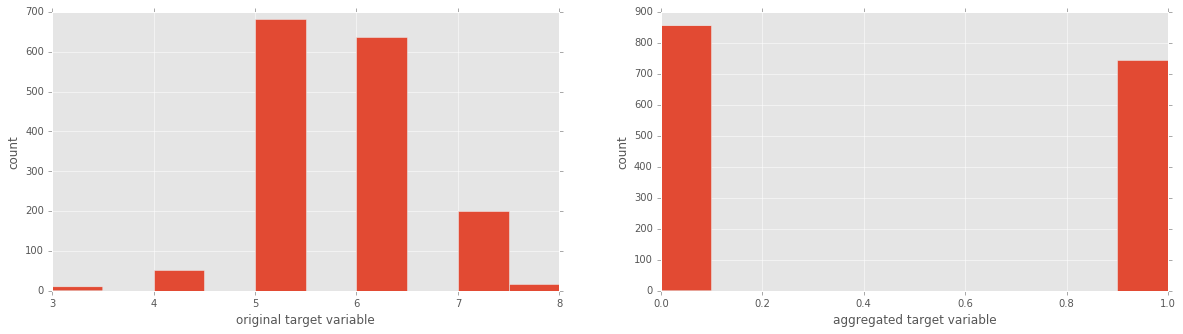

In [8]:
# turn 'quality' into a two category variable
# 'good' if quality > 5, 'bad' if <= 5
# plot histogram of original target variable and aggregated target variable
y = y1 <= 5
plt.figure(figsize=[20, 5])
plt.subplot(1, 2, 1)
plt.hist(y1)
plt.xlabel('original target variable')
plt.ylabel('count')
plt.subplot(1, 2, 2)
plt.hist(y)
plt.xlabel('aggregated target variable')
plt.ylabel('count')
plt.show()

In [9]:
# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [10]:
# apply KNN classifier to the dataset
knc = KNeighborsClassifier(n_neighbors=5)
knc_model_1 = knc.fit(X_train, y_train)
print "The accuracy for test set is %f" % knc_model_1.score(X_test, y_test)

The accuracy for test set is 0.693750


In [11]:
y_true, y_pred = y_test, knc_model_1.predict(X_test)
print classification_report(y_true, y_pred)

             precision    recall  f1-score   support

      False       0.75      0.72      0.73       187
       True       0.63      0.65      0.64       133

avg / total       0.70      0.69      0.69       320



In [12]:
# now apply KNN classifier to the scaled dataset
Xs = scale(X)
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=7)
knc_model_2 = knc.fit(Xs_train, y_train)
print "The accuracy for test set is %f" % knc_model_2.score(Xs_test, y_test)
print "The accuracy for train_test_split set is %f" % knc_model_2.score(Xs_train, y_train)

The accuracy for test set is 0.771875
The accuracy for train_test_split set is 0.799062


In [13]:
y_true, y_pred = y_test, knc_model_2.predict(Xs_test)
print classification_report(y_true, y_pred)

             precision    recall  f1-score   support

      False       0.79      0.84      0.81       187
       True       0.75      0.68      0.71       133

avg / total       0.77      0.77      0.77       320



In [14]:
# test KNN against different k values
k_range = np.arange(1, 30)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xs_train, y_train)
    scores.append(knn.score(Xs_test, y_test))

high_score_idx = scores.index(max(scores))
best_k = k_range[high_score_idx]
print "The highest score of %f is provided by the 'k' value %d" % (max(scores), best_k)

The highest score of 0.778125 is provided by the 'k' value 12


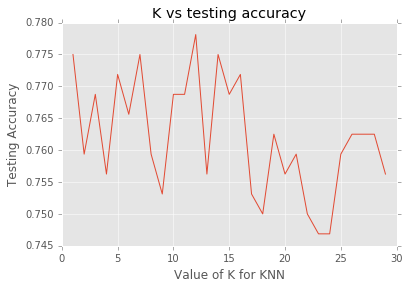

In [15]:
# plot k vs testing accuracy scores
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid(True)
plt.title('K vs testing accuracy')
plt.show()

In [16]:
# applying logistic regression on unscaled training set
lr = LogisticRegression()
lr_us = lr.fit(X_train, y_train)
print "Accuracy score for the training set is %f\n" % lr_us.score(X_train, y_train)
y_true, y_pred = y_test, lr_us.predict(X_test)
print classification_report(y_true, y_pred)

Accuracy score for the training set is 0.744332

             precision    recall  f1-score   support

      False       0.79      0.76      0.78       187
       True       0.68      0.72      0.70       133

avg / total       0.75      0.74      0.74       320



In [17]:
# now applying logistic regression on scaled training set
lr_s = lr.fit(Xs_train, y_train)
print "Accuracy score for the training set is %f\n" % lr_s.score(Xs_train, y_train)
y_true, y_pred = y_test, lr_s.predict(Xs_test)
print classification_report(y_true, y_pred)

Accuracy score for the training set is 0.743550

             precision    recall  f1-score   support

      False       0.81      0.78      0.79       187
       True       0.71      0.74      0.72       133

avg / total       0.76      0.76      0.76       320



**The performance of logistic regression will not improve with data scaling. The reason is that, if there are predictor variables which do not affect the target variable, a regression algorithm will make the corresponding coefficients (in the logistic regression function) small, so that it will not affect the prediction so much**